In [10]:
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
import numpy as np
from numpy import mean
from numpy import arange
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
data = pd.read_csv("ha.csv")
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']
X = data.drop('target',axis=1)
y = data['target']
model = AdaBoostClassifier()
# fit the model on the whole dataset
model.fit(X, y)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.854 (0.027)


>10 0.850 (0.030)
>50 0.854 (0.027)
>100 0.852 (0.029)
>500 0.855 (0.031)
>1000 0.857 (0.031)
>5000 0.871 (0.029)


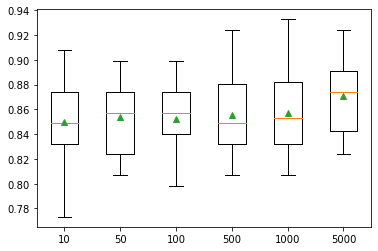

In [4]:
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = AdaBoostClassifier(n_estimators=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
def get_models():
	models = dict()
	# explore depths from 1 to 10
	for i in range(1,20):
		# define base model
		base = DecisionTreeClassifier(max_depth=i)
		# define ensemble model
		models[str(i)] = AdaBoostClassifier(base_estimator=base)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.854 (0.027)
>2 0.876 (0.029)
>3 0.913 (0.024)
>4 0.918 (0.021)
>5 0.921 (0.020)
>6 0.926 (0.017)
>7 0.928 (0.021)
>8 0.933 (0.021)
>9 0.935 (0.020)
>10 0.931 (0.020)
>11 0.931 (0.021)
>12 0.927 (0.028)
>13 0.909 (0.036)
>14 0.893 (0.035)
>15 0.891 (0.035)
>16 0.890 (0.030)
>17 0.899 (0.029)
>18 0.906 (0.030)
>19 0.901 (0.030)


In [11]:
def get_models():
	models = dict()
	# explore learning rates from 0.1 to 2 in 0.1 increments
	for i in arange(0.1, 2.1, 0.1):
		key = '%.3f' % i
		models[key] = AdaBoostClassifier(learning_rate=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

>0.100 0.846 (0.025)
>0.200 0.851 (0.025)
>0.300 0.857 (0.024)
>0.400 0.858 (0.027)
>0.500 0.857 (0.030)
>0.600 0.857 (0.031)
>0.700 0.855 (0.025)
>0.800 0.859 (0.029)
>0.900 0.855 (0.029)
>1.000 0.854 (0.027)
>1.100 0.857 (0.029)
>1.200 0.853 (0.033)
>1.300 0.854 (0.032)
>1.400 0.853 (0.032)
>1.500 0.848 (0.027)
>1.600 0.849 (0.028)
>1.700 0.843 (0.031)
>1.800 0.841 (0.028)
>1.900 0.823 (0.039)
>2.000 0.497 (0.218)


In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
model = AdaBoostClassifier(base_estimator=LogisticRegression())
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.827 (0.034)


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
# define dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model with default hyperparameters
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.813667 using {'learning_rate': 0.1, 'n_estimators': 500}
0.646333 (0.036376) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.646667 (0.036545) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.646667 (0.036545) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.647000 (0.038136) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.646667 (0.036545) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.647000 (0.038136) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.654333 (0.045511) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.672667 (0.046543) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.648333 (0.042197) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.671667 (0.045613) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.715000 (0.053213) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.767667 (0.045948) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.716667 (0.048876) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.767000

In [25]:
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print(mean(n_scores))

TypeError: 'numpy.float64' object is not callable